<a href="https://colab.research.google.com/github/jsKim-prog/AIStudy24/blob/master/%EC%9D%B4%EC%9B%83%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 시나리오
*이번에는 여름에 농어철로 농어 주문이 크게 늘어서 MBC 마켓에서 업계 최초로 농어를 무게 단위로 판매하려고 한다.
* 무게 단위로 판매를 하면 가격 측정도 원활하고 고객도 합리적으로 판단을 할 수 있다.
* 그런데 공급처에서 생선 무게를 잘못 측정해서 보낼 수도 있다.

### 가설
* 농어의 무게를 재측정 해야 한다.
* 다른 데이터는 정상범위가 있으니 예측할 수 있을까?
* 이렇게 예측하는 것을 회귀라고 한다.
* 샘플 데이터가 필요하겠군!
* 외부에서 56개의 샘플을 받아서 처리해보자.

지도학습은 크게 2가지로 나뉘어짐
* 분류 (2진분류) ->  빙어냐, 도미냐
* 회귀 (예측 : 확률) -> 임의의 어떤 숫자로 예측

회귀 :  두 변수 사이의 상관관계를 분석하는 방법

In [ ]:
# 리눅스 명령어로 코랩의 가상머신에 나눔폰트를 설치하고 적용하는 명령어
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
# 농어의 샘플자료 56개
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [ ]:
def show_plt():
    plt.xlabel("length")
    plt.ylabel("weight")
    plt.show()

기초자료


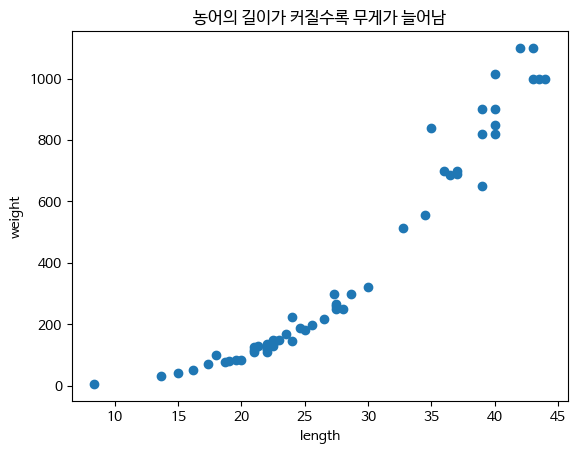

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family = 'NanumBarunGothic')    # 한글처리

plt.scatter(perch_length, perch_weight)
print('기초자료')
plt.title('농어의 길이가 커질수록 무게가 늘어남')
show_plt()
# 산점도를 그리고 나니 길이가 커짐에 따라 무게도 늘어남
# 이 데이터를 토대로 훈련과 테스트를 진행

In [ ]:
# k-최근접 이웃 알고리즘에서의 회귀

# 예측하려는 샘플에 가장 가까운 샘플 k개를 선택한다.
# 이 샘플들의 클래스를 확인하여 다수 클래스를 새로운 샘플의 클래스로 예측함
# k = 3 이라고 가정하면 2개의 다수가 있어 분류는 사각형으로 판단
# 회귀는 샘플에 가장 가까운 샘플 k개를 선택
# 타깃값 100, 80, 60 을 더해 3으로 나눈 평균이 타깃값으로 사용됨


### 분류와 회귀 알고리즘

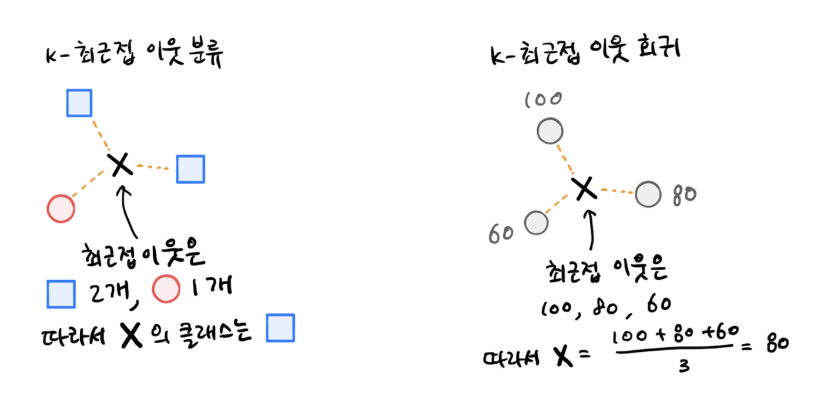

In [ ]:
# 사이킷런에서 제공하는 훈련세트, 테스트세트 생성
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

# 사이킷런의 train_test_split 함수를 사용해 훈련세트와 테스트 세트로 나눔
# random_state=42 :  서로 같은 테스트를 위해 시드값 제공

# 사이킷런에 사용할 훈련 세트는 2차원 배열을 사용함
# perch_length가 1차원 배열이기 때문에 train_input, test_input도 1차원 배열임
# [3, ] -> [3, 1] 2차원 배열을 사용해야 하므로 억지로 변환 -> reshape() 메서드 활용 (4,)-> (2,2)

In [ ]:
test_array = np.array([1,2,3,4])
print(test_array.shape)

(4,)


In [ ]:
# 2차원 배열로 변환
test_array = test_array.reshape(2, 2)
print(test_array.shape)
print(test_array)

# 전에는 2개의 특성으로 사용했었기 때문에 자연스럽게 열이 2개인 2차원 배열을 사용했었지만
# 이번에는 특성이 1개로 수동으로 2차원 배열을 만들어야 함 -> 넘파이.reshape()
# (4,) -> (2,2) 크기로 바꿔줌

(2, 2)
[[1 2]
 [3 4]]


In [ ]:
# 입력데이터인 train_input과 test_input을 2차원 배열로 바꾸어야 함
# train_input (42,) -> (42, 1) -> train_input.reshape(42, 1)
# 넘파이는 배열의 크기를 자동으로 지정하는 기능도 제공 : (-1) 값을 넣으면 된다.
train_input = train_input.reshape(-1, 1)    # -1을 지정하면 원소 개수로 모두 채우라는 의미 , 1은 두 번째 채우는 값
test_input = test_input.reshape(-1, 1)
print(train_input.shape, test_input.shape)  # -1을 사용하면 매면 원소의 크기를 외우지 않아도 됨

(42, 1) (14, 1)


In [ ]:
# 전처리 끝
# 훈련시작

from sklearn.neighbors import KNeighborsRegressor   # 회귀 알고리즘용 구현 클래스
# from sklearn.neighbors import KNeighborsClassifier # 분류용
knr = KNeighborsRegressor()
# k-최근접 이웃 회귀 모델을 훈련합니다.
knr.fit(train_input, train_target)  #회귀용으로 훈련


KNeighborsRegressor()

In [ ]:
knr.score(test_input, test_target)
# 분류의 경우는 테스트 세트에 있는 샘플을 정확하게 분류한 개수의 비율(정확도) -> 예측값
# 회귀인 경우에는 평가를 결정계수라고 함 : R^2
# R^2 = 1-((타깃-예측)^2의 합) / (타깃-평균)^2의 합))
# 타깃의 평균정도를 예측하는 수준 -> R^2은 0에 가까워지고, 예즉이 타깃에 가까워지면 1에 가까운 값

0.992809406101064

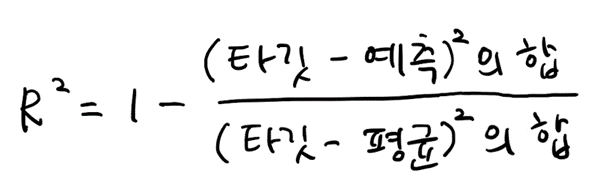

In [ ]:
# sklearn.metrics 패키지 아래 여러가지 측정도구를 제공함
# mean_absolute_error : 절대값 오차를 평균하여 반환

from sklearn.metrics import mean_absolute_error

# 테스트 세트에 대한 예측(predict)을 만듭니다
test_prediction = knr.predict(test_input)
mae = mean_absolute_error(test_target, test_prediction)
# 테스트 세트에 대한 평균 절대값 오차 계산

print(mae)
# 19g 정도 타깃값과 다르다.(타깃과 예측한 값 사이의 차이)

19.157142857142862


In [ ]:
print(knr.score(train_input, train_target)) # 훈련한 모델을 사용해 훈련세트 점수 확인

0.9698823289099254


In [ ]:
# 위 결과를 보면 모델을 훈련 세트에 훈련하면 훈련세트에 잘 맞는 모델이 만들어짐
# 이 모델을 훈련세트와 테스트세트에서 평가하면 두 값 중에 어느것이 높을까?

# 보통 훈련세트의 점수가 조금 더 높게 나옴
# 훈련세트에서 점수가 굉장히 좋았는데 테스트 세트에서는 점수가 굉장히 나쁘면 과대 적합이라고 함
# 과소 적합 : 훈련세트보다 테스트세트가 점수가 높아???, 두 점수가 모두 낮은 경우

# 사이킷런의 알고리즘 기본값을 3개로 조절해보자.

# 사이킷런의 k-최근접이웃 기본값이 5인데 이것을 3으로 변경
# 이웃의 개수를 3으로 설정
knr.n_neighbors=3
#모델을 다시 훈련
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

0.9804899950518966


In [ ]:
print(knr.score(test_input, test_target))   # 이웃 개수 조정으로 과대, 과소 적합 해결

0.9746459963987609


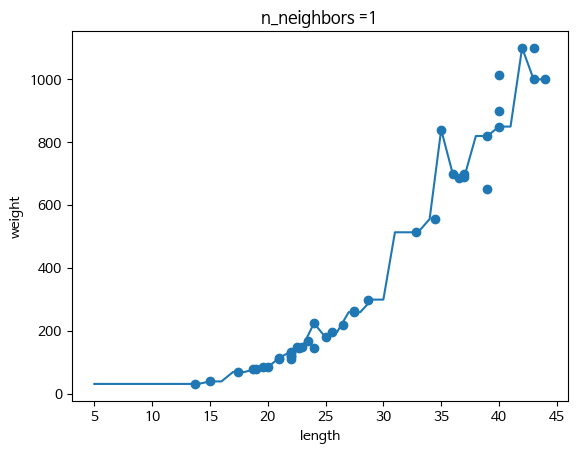

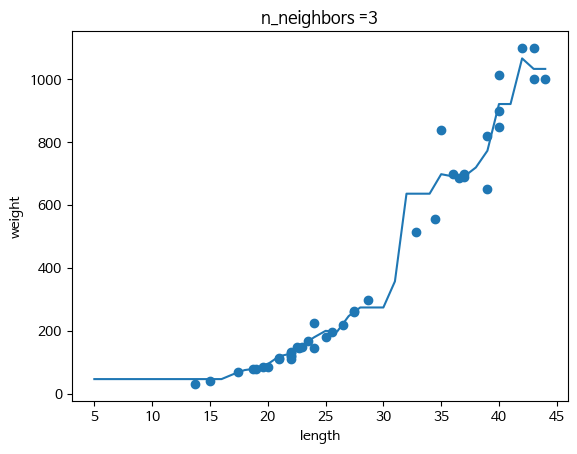

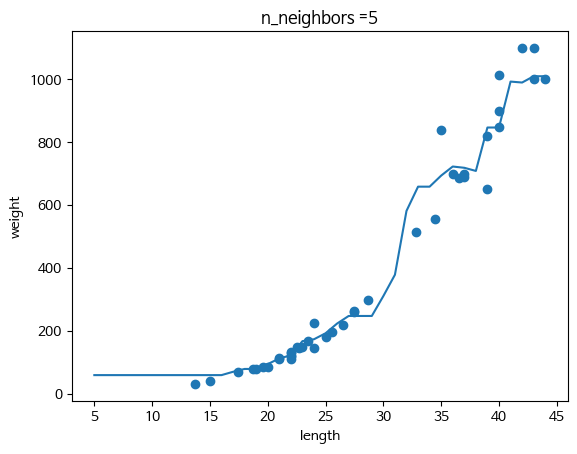

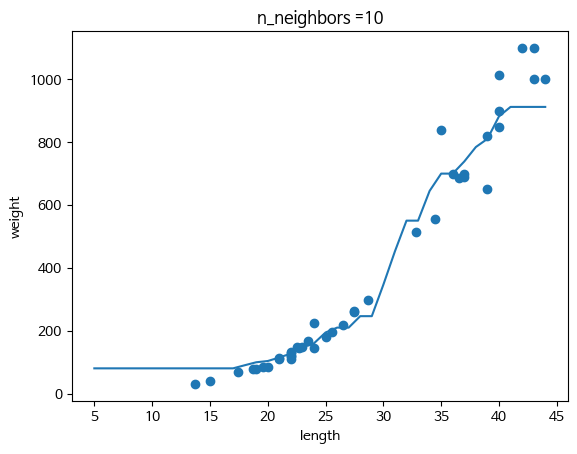

In [ ]:
# k-최근접 이웃 회귀 객체를 만듭니다.
knr = KNeighborsRegressor()
# 5~45 x 좌표 만들기
x = np.arange(5, 45).reshape(-1, 1)

# n = 1, 5, 10 일 때 예측결과를 그래프로 그립니다.
for n in [1, 3, 5, 10]:
        # 모델훈련
        knr.n_neighbors = n
        knr.fit(train_input, train_target)
        #지정한 번위 x에 대한 예측 구하기
        prediction = knr.predict(x)
        # 훈련세트와 예측결과 그래프 그리기
        plt.scatter(train_input, train_target)
        plt.plot(x, prediction)
        plt.title('n_neighbors ={}'.format(n))
        show_plt()